# 最急降下法

## データ準備

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("sample_data.csv")

In [3]:
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


## データ可視化

＜復習＞  
-　sns.scatterplot(x = "x軸にプロットする変数名", y = "y軸にプロットする変数名", data = データフレーム)

<AxesSubplot:xlabel='space', ylabel='rent'>

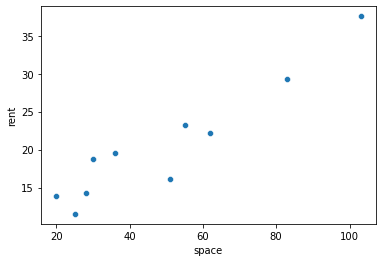

In [4]:
sns.scatterplot(x = df["space"], y = df["rent"])

<AxesSubplot:xlabel='space', ylabel='rent'>

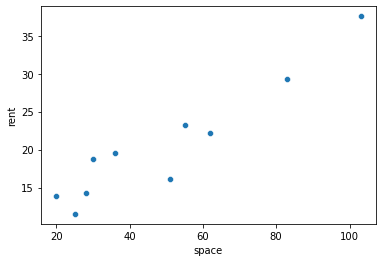

In [5]:
sns.scatterplot(x = "space", y = "rent", data = df)

## 損失関数定義

In [6]:
x = df["space"].values
y = df["rent"].values

def cost_func(theta_0, theta_1, x, y):
    return np.mean((y - (theta_0 + theta_1*x))**2)

cost_func(2,3, x = x, y = y)

21664.319648883382

## 損失関数可視化

＜復習＞  
# plt.axes()
- plt.axes():3D Axes(軸)オブジェクトを作成する
- projectionでどの種類の3Dプロットを作成するかを指定する
# ax.plot_surface()
- ax.plot_surface():３次元データを可視化する表現方法(axは3次元オブジェクト)
- ax.plot_surface(x, y, z, cmap =  , alpha =  )
- cmap:colormapのことで、サーフェス上の値を色で表現する。jetカラーマップはデータの値に基づいて青から赤までの色を使用
- alpha:透明度

In [7]:
import matplotlib.pyplot as plt

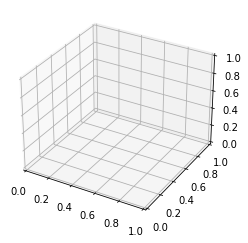

In [8]:
#ax = plt.axes(projection = '3d')

In [9]:
#x = np.array([1, 2, 3, 4])
#y = np.array([10, 20, 30, 40])
#X, Y = np.meshgrid(x, y)

In [10]:
#from itertools import product
#z = [x*y for x, y in product(x, y)]
#Z = np.array(z).reshape(4, 4)
#Z

array([[ 10,  20,  30,  40],
       [ 20,  40,  60,  80],
       [ 30,  60,  90, 120],
       [ 40,  80, 120, 160]])

In [11]:
#X = np.array([[1, 2, 3, 4],
#             [1, 2, 3, 4],
#             [1, 2, 3, 4],
#             [1, 2, 3, 4]])
#Y = np.array([[10, 10, 10, 10],
#              [20, 20, 20, 20],
#              [30, 30, 30, 30],
#              [40, 40, 40, 40]])
#Z = np.array([[10, 20, 30, 40],
#             [20, 40, 60, 80],
#             [30, 60, 90, 120],
#             [40, 80, 120, 160]])

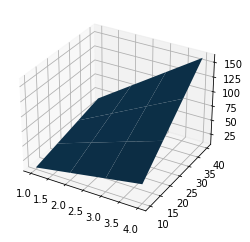

In [12]:
#ax = plt.axes(projection = '3d')
#ax.plot_surface(X = X.T, Y = Y.T, Z = Z)

In [10]:
from itertools import product
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1
n_0 = n_1 = 300

theta_0 = np.linspace(min_0, min_1, n_0)
theta_1 = np.linspace(min_1, max_1, n_1)
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
# イテレータ作成
product(theta_0, theta_1)
# Zは損失関数の値(目的変数)となる
z = [cost_func(param[0], param[1], x = x, y = y) for param in list(product(theta_0, theta_1))]
Z = np.array(z).reshape(n_0, n_1)

＜復習＞. 
- plt.gca().invert_xaxis():x軸の向きを反転させる(通常は左から右へ増加していくが、これを使用すると右から左へ増加する向きに変わる)
- ax.view_init(elev =  , azim = )
- elev: 仰角（elevation angle）を指定します。仰角は水平面から上向きに向かっての視点の傾きを表します。値が大きいほど視点は上に向かい、値が小さいほど視点は下に向かいます。
- azim: 方位角（azimuthal angle）を指定します。方位角は水平面に対する視点の回転を表します。値が大きいほど視点は右に、値が小さいほど視点は左に回転します。

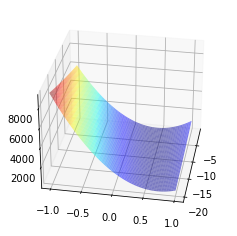

In [11]:
ax = plt.axes(projection = "3d")
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap = 'jet', alpha = 0.5)
plt.gca().invert_xaxis()
ax.view_init(elev = 30, azim = 10)

## 最急降下法

In [12]:
#theta_0_init = np.random.uniform(min_0, max_0)

theta_0_init = -5
theta_1_init = -0.5

# theta_0の更新
def update_theta0(theta_0, theta_1, x, y, alpha = 0.05):
    return theta_0-alpha * np.mean((theta_0 + theta_1 * x) - y)*2

# theta_1の更新
def update_theta1(theta_0, theta_1, x, y, alpha = 0.05):
    return theta_1-alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

epochs = 100000
alpha = 0.00005

theta_0_hist = []
theta_1_hist = []
# 初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epochs):
    update_theta_0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x = x, y = y, alpha = alpha)
    update_theta_1 = update_theta1(theta_0_hist[-1], theta_1_hist[-1], x = x, y = y, alpha = alpha)
    theta_0_hist.append(update_theta_0)
    theta_1_hist.append(update_theta_1)

In [13]:
print(theta_1_hist[-1])
print(theta_0_hist[-1])

0.2972194648547114
5.692313583745944


## 結果の描画

In [14]:
# 損失関数の値
cost_hist = [cost_func(*param, x = x, y = y)for param in zip(theta_0_hist, theta_1_hist)]

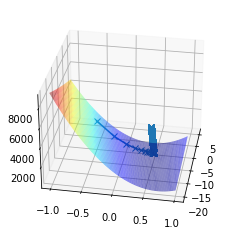

In [15]:
ax = plt.axes(projection = "3d")
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap = 'jet', alpha = 0.5)
plt.gca().invert_xaxis()
ax.view_init(elev = 30, azim = 10)

Text(0, 0.5, 'theta_0')

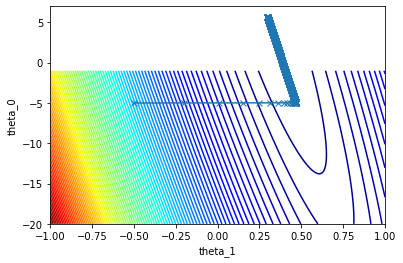

In [16]:
# 等高線の描画
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap = 'jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel("theta_1")
plt.ylabel("theta_0")

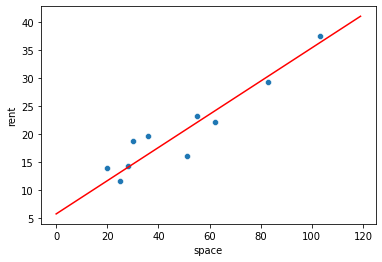

In [17]:
sns.scatterplot(x = "space", y = "rent", data = df)
x_values = np.arange(120)
y_values = theta_0_hist[-1] + theta_1_hist[-1]*x_values
plt.plot(x_values, y_values, '-', color = 'r')

In [18]:
space = 70
rent = theta_0_hist[-1] + theta_1_hist[-1]*space

In [19]:
rent

26.497676123575744

In [20]:
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


# 正規方程式

In [47]:
X = df["space"].values
y = df["rent"].values

In [48]:
X = np.array([np.ones(len(X)),
             X]).T

In [49]:
X

array([[  1.,  20.],
       [  1.,  25.],
       [  1.,  28.],
       [  1.,  30.],
       [  1.,  36.],
       [  1.,  51.],
       [  1.,  55.],
       [  1.,  62.],
       [  1.,  83.],
       [  1., 103.]])

In [50]:
XT = X.T

In [51]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(XT,X)),XT),y)

In [52]:
theta

array([7.0962325 , 0.27487161])

Text(0, 0.5, 'theta_0')

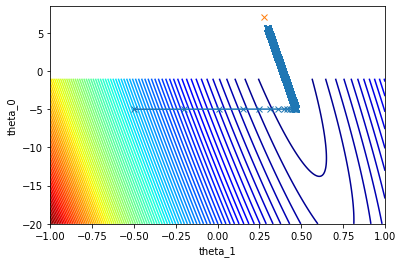

In [61]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap = 'jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.plot(theta[1], theta[0], 'x-')
plt.xlabel("theta_1")
plt.ylabel("theta_0")

In [54]:
# 動画内回答

In [57]:
X = np.vstack([np.ones(len(x)), x]).T

In [58]:
X

array([[  1.,  20.],
       [  1.,  25.],
       [  1.,  28.],
       [  1.,  30.],
       [  1.,  36.],
       [  1.,  51.],
       [  1.,  55.],
       [  1.,  62.],
       [  1.,  83.],
       [  1., 103.]])

In [85]:
# θ = (X^T * X)^(-1) * X^T * y

In [63]:
best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.T)

Text(0, 0.5, 'theta_0')

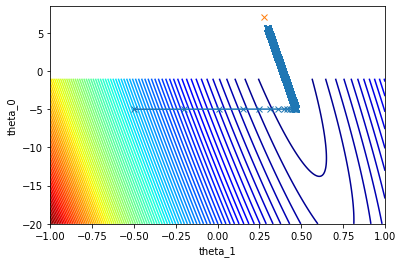

In [64]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap = 'jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.plot(best_theta[1], best_theta[0], 'x-')
plt.xlabel("theta_1")
plt.ylabel("theta_0")

# sklearnで線形回帰モデルを構築

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [78]:
# fitするXは行列である必要がある(2次元である必要がある)
# 今回は特徴量が1つなので１列
X = x.reshape(-1, 1)

In [76]:
model.fit(X, y)

LinearRegression()

In [77]:
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [84]:
# 2次元で与える必要がある
model.predict([[30]])

array([15.34238078])

In [82]:
# coefficient 係数
model.coef_

array([0.27487161])

In [81]:
# intercept 切片
model.intercept_

7.096232499908833

## 復習

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

In [2]:
df = pd.read_csv('sample_data.csv')
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


<AxesSubplot:xlabel='space', ylabel='rent'>

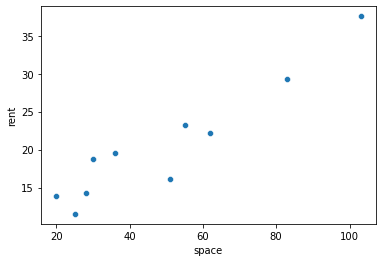

In [3]:
sns.scatterplot(x = 'space', y = 'rent', data = df)

In [21]:
X = df["space"].values
y = df["rent"]

def cost_func(theta_0, theta_1, x, y):
    return np.mean(y - (theta_0 + theta_1 * x))

cost_func(2,2,X,y)

-79.95259715448017

In [22]:
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1
n_0 = 300
n_1 = 300
theta_0 = np.linspace(min_0, max_0, n_0)
theta_1 = np.linspace(min_1, max_1, n_1)
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
z = [cost_func(*param, x = X, y = y) for param in list(product(theta_0, theta_1))]
Z = np.array(z).reshape(n_0, n_1)

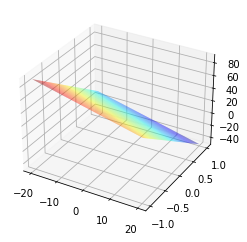

In [20]:
ax = plt.axes(projection = '3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap = 'jet', alpha = 0.5)
plt.gca().invert_xaxis()
ax.view_init(elev = 30, azim = 10)

In [18]:
theta_1_ax

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.99331104, -0.99331104, -0.99331104, ..., -0.99331104,
        -0.99331104, -0.99331104],
       [-0.98662207, -0.98662207, -0.98662207, ..., -0.98662207,
        -0.98662207, -0.98662207],
       ...,
       [ 0.98662207,  0.98662207,  0.98662207, ...,  0.98662207,
         0.98662207,  0.98662207],
       [ 0.99331104,  0.99331104,  0.99331104, ...,  0.99331104,
         0.99331104,  0.99331104],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])